In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!kaggle datasets download -d kaiska/apparel-dataset

Dataset URL: https://www.kaggle.com/datasets/kaiska/apparel-dataset
License(s): CC0-1.0
 98% 158M/161M [00:00<00:00, 239MB/s]
100% 161M/161M [00:00<00:00, 243MB/s]


In [4]:
! unzip /content/apparel-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: red_shirt/137.jpg       
  inflating: red_shirt/138.jpg       
  inflating: red_shirt/139.jpg       
  inflating: red_shirt/14.jpg        
  inflating: red_shirt/140.jpg       
  inflating: red_shirt/141.jpg       
  inflating: red_shirt/142.jpg       
  inflating: red_shirt/143.jpg       
  inflating: red_shirt/144.jpg       
  inflating: red_shirt/145.jpg       
  inflating: red_shirt/146.jpg       
  inflating: red_shirt/147.jpg       
  inflating: red_shirt/148.jpg       
  inflating: red_shirt/149.jpg       
  inflating: red_shirt/15.jpg        
  inflating: red_shirt/150.jpg       
  inflating: red_shirt/151.jpg       
  inflating: red_shirt/152.jpg       
  inflating: red_shirt/153.jpg       
  inflating: red_shirt/154.jpg       
  inflating: red_shirt/155.jpg       
  inflating: red_shirt/156.jpg       
  inflating: red_shirt/157.jpg       
  inflating: red_shirt/158.jpg       
  inflating: red_shirt/159.jpg       

In [5]:
!kaggle datasets download -d masouduut94/digikala-color-classification

Dataset URL: https://www.kaggle.com/datasets/masouduut94/digikala-color-classification
License(s): GPL-2.0
 70% 25.0M/35.9M [00:00<00:00, 98.0MB/s]
100% 35.9M/35.9M [00:00<00:00, 105MB/s] 


In [6]:
! unzip /content/digikala-color-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/brown/105735637.jpg  
  inflating: train/brown/105736914.jpg  
  inflating: train/brown/105737049.jpg  
  inflating: train/brown/105739351.jpg  
  inflating: train/brown/105739998.jpg  
  inflating: train/brown/105741279.jpg  
  inflating: train/brown/105742121.jpg  
  inflating: train/brown/105743307.jpg  
  inflating: train/brown/105743416.jpg  
  inflating: train/brown/105745625.jpg  
  inflating: train/brown/105745658.jpg  
  inflating: train/brown/105745804.jpg  
  inflating: train/brown/105746292.jpg  
  inflating: train/brown/105747025.jpg  
  inflating: train/brown/105751285.jpg  
  inflating: train/brown/105751947.jpg  
  inflating: train/brown/105752947.jpg  
  inflating: train/brown/105753529.jpg  
  inflating: train/brown/105754762.jpg  
  inflating: train/brown/105756364.jpg  
  inflating: train/brown/105757456.jpg  
  inflating: train/brown/105757491.jpg  
  inflating: train/brown/105759450.jpg  
  infl

In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import uuid

In [8]:
parent = '/content/'
cloth_path = os.path.join(parent, f'cloth/')
cloth_train_path = os.path.join(cloth_path, f'train/')
cloth_val_path = os.path.join(cloth_path, f'validation/')
os.mkdir(cloth_path)
os.mkdir(cloth_train_path)
os.mkdir(cloth_val_path)

shirt_train_path = os.path.join(cloth_train_path, 'shirt/')
suit_train_path = os.path.join(cloth_train_path, 'suit/')
hoodie_train_path = os.path.join(cloth_train_path, 'hoodie')
dress_train_path = os.path.join(cloth_train_path, 'dress/')
pants_train_path = os.path.join(cloth_train_path, 'pants/')
skirt_train_path = os.path.join(cloth_train_path, 'skirt/')
shorts_train_path = os.path.join(cloth_train_path, 'shorts/')

shirt_val_path = os.path.join(cloth_val_path, 'shirt/')
suit_val_path = os.path.join(cloth_val_path, 'suit/')
hoodie_val_path = os.path.join(cloth_val_path, 'hoodie')
dress_val_path = os.path.join(cloth_val_path, 'dress/')
pants_val_path = os.path.join(cloth_val_path, 'pants/')
skirt_val_path = os.path.join(cloth_val_path, 'skirt/')
shorts_val_path = os.path.join(cloth_val_path, 'shorts/')

In [9]:
color_path = os.path.join(parent, f'color/')
color_train_path = os.path.join(color_path, f'train/')
color_val_path = os.path.join(color_path, f'validation/')
os.mkdir(color_path)
os.mkdir(color_train_path)
os.mkdir(color_val_path)

black_train_path = os.path.join(color_train_path, 'black/')
blue_train_path = os.path.join(color_train_path, 'blue/')
brown_train_path = os.path.join(color_train_path, 'brown/')
green_train_path = os.path.join(color_train_path, 'green/')
pink_train_path = os.path.join(color_train_path, 'pink/')
red_train_path = os.path.join(color_train_path, 'red/')
# silver_train_path = os.path.join(color_train_path, 'silver/')
white_train_path = os.path.join(color_train_path, 'white/')
yellow_train_path = os.path.join(color_train_path, 'yellow/')
grey_train_path = os.path.join(color_train_path, 'grey/')
# orange_train_path = os.path.join(color_train_path, 'orange/')
# purple_train_path = os.path.join(color_train_path, 'purple/')

black_val_path = os.path.join(color_val_path, 'black/')
blue_val_path = os.path.join(color_val_path, 'blue/')
brown_val_path = os.path.join(color_val_path, 'brown/')
green_val_path = os.path.join(color_val_path, 'green/')
pink_val_path = os.path.join(color_val_path, 'pink/')
red_val_path = os.path.join(color_val_path, 'red/')
# silver_val_path = os.path.join(color_val_path, 'silver/')
white_val_path = os.path.join(color_val_path, 'white/')
yellow_val_path = os.path.join(color_val_path, 'yellow/')
grey_val_path = os.path.join(color_val_path, 'grey/')
# orange_val_path = os.path.join(color_val_path, 'orange/')
# purple_val_path = os.path.join(color_val_path, 'purple/')

In [10]:
def split_data(source_dir, train_dir, val_dir, split):
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(val_dir, exist_ok=True)
  img = [file for file in os.listdir(source_dir)]
  index = int(len(img) * split)
  train = img[:index]
  val = img[index:]

  for file in train:
    shutil.copyfile(os.path.join(source_dir, file), os.path.join(train_dir, str(uuid.uuid4()) + '_' + file))

    # Copy files to the validation directory
  for file in val:
    shutil.copyfile(os.path.join(source_dir, file), os.path.join(val_dir, str(uuid.uuid4()) + '_' + file))

In [11]:
split = 0.9
shirt_path = '/content/blue_shirt'
suit_path = '/content/white_suit'
suit_path2 = '/content/black_suit'
hoodie_path = '/content/red_hoodie'
hoodie_path2 = '/content/pink_hoodie'
dress_path = '/content/white_dress'
pants_path = '/content/black_pants'
skirt_path = '/content/pink_skirt'
skirt_path2 = '/content/silver_skirt'
shorts_path = '/content/black_shorts'
shorts_path2 = '/content/blue_shorts'

split_data(shirt_path, shirt_train_path, shirt_val_path, split)
split_data(suit_path, suit_train_path, suit_val_path, split)
split_data(suit_path2, suit_train_path, suit_val_path, split)
split_data(hoodie_path, hoodie_train_path, hoodie_val_path, split)
split_data(hoodie_path2, hoodie_train_path, hoodie_val_path, split)
split_data(dress_path, dress_train_path, dress_val_path, split)
split_data(pants_path, pants_train_path, pants_val_path, split)
split_data(skirt_path, skirt_train_path, skirt_val_path, split)
split_data(skirt_path2, skirt_train_path, skirt_val_path, split)
split_data(shorts_path, shorts_train_path, shorts_val_path, split)
split_data(shorts_path2, shorts_train_path, shorts_val_path, split)

In [12]:
train_paths = {
    'shirt': shirt_train_path,
    'suit': suit_train_path,
    'hoodie': hoodie_train_path,
    'dress': dress_train_path,
    'pants': pants_train_path,
    'skirt': skirt_train_path,
    'shorts': shorts_train_path,
}

val_paths = {
    'shirt': shirt_val_path,
    'suit': suit_val_path,
    'hoodie': hoodie_val_path,
    'dress': dress_val_path,
    'pants': pants_val_path,
    'skirt': skirt_val_path,
    'shorts': shorts_val_path,
}

# Function to count files in a directory
def count_files(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

# Print the counts for training and validation sets
total_train_files = 0
total_val_files = 0

for category, path in train_paths.items():
    train_count = count_files(path)
    total_train_files += train_count
    print(f'Jumlah train {category}: {train_count}')

for category, path in val_paths.items():
    val_count = count_files(path)
    total_val_files += val_count
    print(f'Jumlah val {category}: {val_count}')

# Print the total counts
print(f'Jumlah keseluruhan train: {total_train_files}')
print(f'Jumlah keseluruhan val: {total_val_files}')
print(f'Jumlah keseluruhan train + val: {total_train_files + total_val_files}')


Jumlah train shirt: 666
Jumlah train suit: 606
Jumlah train hoodie: 626
Jumlah train dress: 736
Jumlah train pants: 783
Jumlah train skirt: 785
Jumlah train shorts: 564
Jumlah val shirt: 75
Jumlah val suit: 68
Jumlah val hoodie: 70
Jumlah val dress: 82
Jumlah val pants: 87
Jumlah val skirt: 89
Jumlah val shorts: 63
Jumlah keseluruhan train: 4766
Jumlah keseluruhan val: 534
Jumlah keseluruhan train + val: 5300


In [13]:
split = 0.9
black_path = '/content/train/black'
blue_path = '/content/train/blue'
brown_path = '/content/train/brown'
green_path = '/content/train/green'
grey_path = '/content/train/grey'
orange_path = '/content/train/orange'
pink_path = '/content/train/pink'
purple_path = '/content/train/purple'
red_path = '/content/train/red'
silver_path = '/content/train/silver'
white_path = '/content/train/white'
yellow_path = '/content/train/yellow'

split_data(black_path, black_train_path, black_val_path, split)
split_data(blue_path, blue_train_path, blue_val_path, split)
split_data(brown_path, brown_train_path, brown_val_path, split)
split_data(green_path, green_train_path, green_val_path, split)
split_data(grey_path, grey_train_path, grey_val_path, split)
# split_data(orange_path, orange_train_path, orange_val_path, split)
split_data(pink_path, pink_train_path, pink_val_path, split)
# split_data(purple_path, purple_train_path, purple_val_path, split)
split_data(red_path, red_train_path, red_val_path, split)
# split_data(silver_path, silver_train_path, silver_val_path, split)
split_data(white_path, white_train_path, white_val_path, split)
split_data(yellow_path, yellow_train_path, yellow_val_path, split)

In [14]:
img = [file for file in os.listdir(purple_path)]
index = int(len(img) * split)
train = img[:74]
val = img[74:81]

for file in train:
  shutil.copyfile(os.path.join(purple_path, file), os.path.join(pink_train_path, str(uuid.uuid4()) + '_' + file))

for file in val:
  shutil.copyfile(os.path.join(purple_path, file), os.path.join(pink_val_path, str(uuid.uuid4()) + '_' + file))

In [15]:
train_paths = {
    'black': black_train_path,
    'blue': blue_train_path,
    'brown': brown_train_path,
    'green': green_train_path,
    'grey': grey_train_path,
    'pink': pink_train_path,
    'red': red_train_path,
    'white': white_train_path,
    'yellow': yellow_train_path,
}

val_paths = {
    'black': black_val_path,
    'blue': blue_val_path,
    'brown': brown_val_path,
    'green': green_val_path,
    'grey': grey_val_path,
    'pink': pink_val_path,
    'red': red_val_path,
    'white': white_val_path,
    'yellow': yellow_val_path,
}

# Function to count files in a directory
def count_files(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

# Print the counts for training and validation sets
total_train_files = 0
total_val_files = 0

for color, path in train_paths.items():
    train_count = count_files(path)
    total_train_files += train_count
    print(f'Jumlah train {color}: {train_count}')

for color, path in val_paths.items():
    val_count = count_files(path)
    total_val_files += val_count
    print(f'Jumlah val {color}: {val_count}')

# Print the total counts
print(f'Jumlah keseluruhan train: {total_train_files}')
print(f'Jumlah keseluruhan val: {total_val_files}')
print(f'Jumlah keseluruhan train + val: {total_train_files + total_val_files}')


Jumlah train black: 300
Jumlah train blue: 585
Jumlah train brown: 612
Jumlah train green: 633
Jumlah train grey: 617
Jumlah train pink: 380
Jumlah train red: 620
Jumlah train white: 635
Jumlah train yellow: 384
Jumlah val black: 34
Jumlah val blue: 66
Jumlah val brown: 69
Jumlah val green: 71
Jumlah val grey: 69
Jumlah val pink: 42
Jumlah val red: 69
Jumlah val white: 71
Jumlah val yellow: 43
Jumlah keseluruhan train: 4766
Jumlah keseluruhan val: 534
Jumlah keseluruhan train + val: 5300


In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

cloth_train_generator = train_datagen.flow_from_directory(
    directory=cloth_train_path,
    class_mode='categorical',
    color_mode='grayscale',
    target_size=(256, 256),
    batch_size=32
)

color_train_generator = train_datagen.flow_from_directory(
    directory=color_train_path,
    class_mode='categorical',
    color_mode='rgb',
    target_size=(256, 256),
    batch_size=32
)

cloth_val_generator = validation_datagen.flow_from_directory(
    directory=cloth_val_path,
    class_mode='categorical',
    color_mode='grayscale',
    target_size=(256, 256),
    batch_size=32
)

color_val_generator = validation_datagen.flow_from_directory(
    directory=color_val_path,
    class_mode='categorical',
    color_mode='rgb',
    target_size=(256, 256),
    batch_size=32
)



Found 4766 images belonging to 7 classes.
Found 4766 images belonging to 9 classes.
Found 534 images belonging to 7 classes.
Found 534 images belonging to 9 classes.


In [17]:
class JoinedGenerator(tf.keras.utils.Sequence):
    def __init__(self, generator1, generator2):
        self.generator1 = generator1
        self.generator2 = generator2
        self.length = min(len(generator1), len(generator2))

    def __len__(self):
        return self.length

    def __getitem__(self, i):
        x1, y1 = self.generator1[i % len(self.generator1)]  # Gunakan modulo untuk memastikan indeks tidak melebihi panjang generator
        x2, y2 = self.generator2[i % len(self.generator2)]
        return [x1, x2], [y1, y2]

    def on_epoch_end(self):
        self.generator1.on_epoch_end()
        self.generator2.on_epoch_end()

training_generator = JoinedGenerator(cloth_train_generator, color_train_generator)
val_generator = JoinedGenerator(cloth_val_generator, color_val_generator)  # Memperbaiki generator validasi juga

In [168]:
# Input layer for grayscale images
input_cloth = tf.keras.layers.Input(shape=(256, 256, 1), name='cloth_input')
x1 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu)(input_cloth)
x1 = tf.keras.layers.MaxPooling2D(2, 2)(x1)
x1 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu)(input_cloth)
x1 = tf.keras.layers.MaxPooling2D(2, 2)(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)
x1 = tf.keras.layers.Flatten()(x1)

# Input layer for RGB images
input_color = tf.keras.layers.Input(shape=(256, 256, 3), name='color_input')
x2 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu)(input_color)
x2 = tf.keras.layers.MaxPooling2D(2, 2)(x2)
x2 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu)(input_color)
x2 = tf.keras.layers.MaxPooling2D(2, 2)(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
x2 = tf.keras.layers.Flatten()(x2)
x2 = tf.keras.layers.Dense(50, activation=tf.keras.activations.relu)(x2)

cloth_output1 = tf.keras.layers.Dense(50, activation=tf.keras.activations.relu)(x1)
cloth_output2 = tf.keras.layers.Dense(7, activation=tf.keras.activations.relu, name='cloth_output')(cloth_output1)

combined = tf.keras.layers.concatenate([cloth_output1, x2])

color_output = tf.keras.layers.Dense(50, activation=tf.keras.activations.relu)(combined)
color_output = tf.keras.layers.Dense(9, activation=tf.keras.activations.softmax, name='color_output')(color_output)

# Combine into a single model
model = tf.keras.Model(inputs=[input_cloth, input_color], outputs=[cloth_output2, color_output])


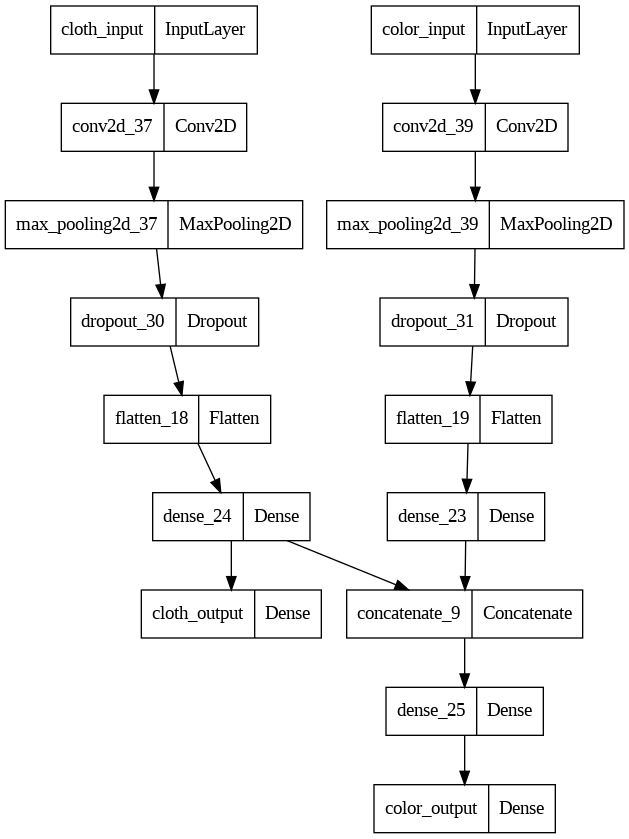

In [169]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [170]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
              loss={'cloth_output': tf.keras.losses.CategoricalCrossentropy(), 'color_output': tf.keras.losses.CategoricalCrossentropy()},
              metrics={'cloth_output': 'accuracy', 'color_output': 'accuracy'})

# Summary of the model
model.summary()

# Assume you have defined your train and validation data generators correctly
model.fit(training_generator,
          epochs= 3,
          validation_data = val_generator)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 cloth_input (InputLayer)    [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 color_input (InputLayer)    [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_37 (Conv2D)          (None, 254, 254, 64)         640       ['cloth_input[0][0]']         
                                                                                                  
 conv2d_39 (Conv2D)          (None, 254, 254, 64)         1792      ['color_input[0][0]']         
                                                                                            

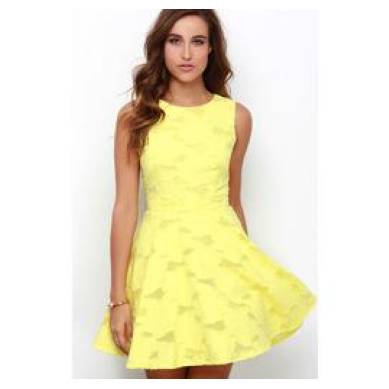

Shape of x (RGB): (1, 256, 256, 3)
Shape of x_gray (grayscale): (1, 256, 256, 1)
1/1 [==============================] - 0s 32ms/step
Cloth class prediction: [[0.        5.5173726 7.5905075 6.3978133 5.381653  6.72952   0.       ]]
Color class prediction: [[0.06778722 0.12716272 0.13037446 0.15440573 0.10339402 0.10231011
  0.12908402 0.11268435 0.07279738]]


In [183]:
# Path ke gambar
path = '/content/yellow_dress/000001.jpg'

# Memuat gambar dan mengubah ukurannya
img = load_img(path, target_size=(256, 256))
x = img_to_array(img)

# Menampilkan gambar asli
plt.imshow(x.astype(int))
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()

# Fungsi untuk mengubah gambar menjadi grayscale
def convert_to_grayscale(image):
    image_gray = tf.image.rgb_to_grayscale(image)
    return image_gray

# Mengubah gambar menjadi grayscale
x_gray = convert_to_grayscale(x)

# Tambahkan dimensi batch
x = np.expand_dims(x, axis=0)  # Untuk input RGB (1, 256, 256, 3)
x_gray = np.expand_dims(x_gray, axis=0)  # Untuk input grayscale (1, 256, 256, 1)

# Pastikan bentuk tensor sesuai dengan yang diharapkan oleh model
print("Shape of x (RGB):", x.shape)  # Expected: (1, 256, 256, 3)
print("Shape of x_gray (grayscale):", x_gray.shape)  # Expected: (1, 256, 256, 1)

# Buat prediksi menggunakan model
cloth_class, color_class = model.predict([x_gray, x])

# Tampilkan hasil prediksi
print("Cloth class prediction:", cloth_class)
print("Color class prediction:", color_class)


In [184]:
cloth_class2 = np.argmax(cloth_class)
color_class2 = np.argmax(color_class)

In [185]:
if cloth_class2 == 0:
  cloth_class3 = 'Dress'
elif cloth_class2 == 1:
  cloth_class3 = 'Hoodie'
elif cloth_class2 == 2:
  cloth_class3 = 'Pants'
elif cloth_class2 == 3:
  cloth_class3 = 'Shirt'
elif cloth_class2 == 4:
  cloth_class3 = 'Shorts'
elif cloth_class2 == 5:
  cloth_class = 'Skirt'
else:
  cloth_class3 = 'Suit'


print(cloth_class3)

Pants


In [186]:
if color_class2 == 0:
    color_class3 = 'Black'
elif color_class2 == 1:
    color_class3 = 'Blue'
elif color_class2 == 2:
    color_class3 = 'Brown'
elif color_class2 == 3:
    color_class3 = 'Green'
elif color_class2 == 4:
    color_class3 = 'Grey'
elif color_class2 == 5:
    color_class3 = 'Pink'
elif color_class2 == 6:
    color_class3 = 'Red'
elif color_class2 == 7:
    color_class3 = 'White'
else:
    color_class3 = 'Yellow'

print(color_class3)

Green
